## Digital Labnote for IE project

### Behavioral test (Figure 1) 

    1. Load OKR Gain table from Google Drive 

In [12]:
OKR_Gain <- read.delim(file="G:/My Drive/Experimental Data/Flocculus_Ex vivo/OKR Gain.txt", 
                       header=T, 
                       sep='\t', 
                       stringsAsFactors = F)

In [13]:
colnames(OKR_Gain)  <- c("pre", "post", "delta")

In [14]:
OKR_Gain

pre,post,delta
<dbl>,<dbl>,<dbl>
0.304,0.433,0.129
0.320,0.640,0.320
0.195,0.668,0.473
0.275,0.768,0.493
0.198,0.314,0.116
0.267,0.805,0.538
0.246,0.595,0.349
0.320,0.625,0.305
0.315,0.655,0.340


    2. Descriptive Statistics

In [15]:
library(psych) # to use 'describe' function
describe(OKR_Gain)


Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pre,1,9,0.2711111,0.04948344,0.275,0.2711111,0.0593040,0.195,0.320,0.125,-0.4527580,-1.5390788,0.01649448
post,2,9,0.6114444,0.15356360,0.640,0.6114444,0.0667170,0.314,0.805,0.491,-0.6328194,-0.8300669,0.05118787
delta,3,9,0.3403333,0.14862032,0.340,0.3403333,0.1971858,0.116,0.538,0.422,-0.2424679,-1.4265961,0.04954011


    3. Perform paired t-test

In [16]:
t.test(x = OKR_Gain$pre, y = OKR_Gain$post, paired = T)


	Paired t-test

data:  OKR_Gain$pre and OKR_Gain$post
t = -6.8699, df = 8, p-value = 0.0001284
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4545730 -0.2260936
sample estimates:
mean of the differences 
             -0.3403333 


-------------

### Mean Firing Rate (Figure 3) 

    1. Load mean firing rate table from Google drive

In [17]:
MFR <- read.delim(file="G:/My Drive/Experimental Data/Flocculus_Ex vivo/MFR_TG.txt", 
                  sep='\t', 
                  stringsAsFactors = T, 
                  header=T)

In [18]:
head(MFR)

,AnimalID,Protocol,Gain,Trial
,<fct>,<fct>,<dbl>,<fct>
1,150216_HC_YG_#01_tt,HC_Tonic,58.26657,+100 pA
2,150216_HC_YG_#02_tt,HC_Tonic,21.26528,+100 pA
3,150216_HC_YG_#03_tt,HC_Tonic,0.00000,+100 pA
4,150216_HC_YG_#05_tt,HC_Tonic,0.00000,+100 pA
5,150216_HC_YG_#06_tt,HC_Tonic,0.00000,+100 pA
6,150216_HC_YG_#09_tt,HC_Tonic,36.90037,+100 pA


In [40]:
library(dplyr)
group_by(MFR, Protocol)  %>%
    summarise(count = n(), 
              mean = mean(Gain, na.rm=T), 
              sd =sd(Gain, na.rm=T))

Protocol,count,mean,sd
<fct>,<int>,<dbl>,<dbl>
HC_Gap,156,73.60251,62.69520
HC_Tonic,696,91.21502,68.59827
OL_Gap,144,61.49726,51.72032
OL_Tonic,492,77.15679,63.20868


In [36]:
library(lme4) #for generation of Linear Mixed Model
library(nlme) #for generation of Linear Mixed Model
library(multcomp)
library(tidyverse) #for data manipulation and visualization
library(ggpubr) #for creating easily publication ready plots
library(rstatix) # provides pipe-friendly R functions for easy statistical analyses
library(lmerTest)
library(psycho)

    2. Generate Linear Mixed Model

In [20]:
LMM.model <- lme(Gain ~ Protocol, 
                 random = ~1|AnimalID, 
                 data=MFR, 
                 na.action = "na.omit")

In [21]:
anova(LMM.model)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,1364,689.169278,0.0000000
Protocol,3,120,3.275965,0.0234902


In [22]:
comp.Protocol <- glht(LMM.model, linfct = mcp(Protocol="Tukey"))

In [23]:
summary(comp.Protocol)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = Gain ~ Protocol, data = MFR, random = ~1 | 
    AnimalID, na.action = "na.omit")

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)  
HC_Tonic - HC_Gap == 0     17.613     10.653   1.653   0.3370  
OL_Gap - HC_Gap == 0      -12.105     13.898  -0.871   0.8129  
OL_Tonic - HC_Gap == 0      3.554     11.050   0.322   0.9879  
OL_Gap - HC_Tonic == 0    -29.718     11.010  -2.699   0.0334 *
OL_Tonic - HC_Tonic == 0  -14.058      7.084  -1.985   0.1850  
OL_Tonic - OL_Gap == 0     15.660     11.394   1.374   0.5033  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


    3. Computation of Two-way repeated measures ANOVA

In [29]:
fit  <- lmer(Gain ~ Protocol*Trial +(1|AnimalID), data=MFR)
anova(fit)


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Protocol,4517.844,1505.948,3,120,3.275963,0.023490262
Trial,2248609.516,204419.047,11,1320,444.682872,0.000000000
Protocol:Trial,27524.871,834.087,33,1320,1.814431,0.003356381


### PB-AHP (Figure 3)

    1. Load PB-AHP table from Google Drive

In [25]:
PB.AHP <- read.delim(file="G:/My Drive/Experimental Data/Flocculus_Ex vivo/PBAHP_TG.txt", 
                  sep='\t', 
                  stringsAsFactors = T, 
                  header=T)

In [26]:
head(PB.AHP)

,AnimalID,Protocol,Gain,Trial
,<fct>,<fct>,<dbl>,<fct>
1,150216_HC_YG_#01_tt,HC_Tonic,9.696228,+100 pA
2,150216_HC_YG_#03_tt,HC_Tonic,2.198822,+100 pA
3,150216_HC_YG_#05_tt,HC_Tonic,2.721176,+100 pA
4,150216_HC_YG_#06_tt,HC_Tonic,3.528900,+100 pA
5,150216_HC_YG_#09_tt,HC_Tonic,4.742615,+100 pA
6,150216_HC_YG_#10_tt,HC_Tonic,9.523437,+100 pA


    2. Generate Linear Mixed Model

In [51]:
LMM1.model <- lme(Gain ~ Protocol*Trial, 
                 random = ~1|AnimalID, 
                 data=PB.AHP, 
                 na.action = "na.omit")

In [52]:
anova(LMM1.model)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,1276,675.686774,0.0000000000
Protocol,3,116,1.244433,0.2969159533
Trial,11,1276,134.518427,0.0000000000
Protocol:Trial,33,1276,2.146290,0.0001933045


In [60]:
comp.Protocol <- glht(LMM1.model, linfct = mcp(Protocol="Tukey"))

Warning message in mcp2matrix(model, linfct = linfct):
"covariate interactions found -- default contrast might be inappropriate"


In [61]:
summary(comp.Protocol)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = Gain ~ Protocol * Trial, data = PB.AHP, random = ~1 | 
    AnimalID, na.action = "na.omit")

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)
HC_Tonic - HC_Gap == 0     0.6041     1.1081   0.545    0.946
OL_Gap - HC_Gap == 0      -0.3710     1.4385  -0.258    0.994
OL_Tonic - HC_Gap == 0     0.1420     1.1472   0.124    0.999
OL_Gap - HC_Tonic == 0    -0.9750     1.1449  -0.852    0.823
OL_Tonic - HC_Tonic == 0  -0.4620     0.7467  -0.619    0.923
OL_Tonic - OL_Gap == 0     0.5130     1.1827   0.434    0.971
(Adjusted p values reported -- single-step method)


-------------------------

### Single AP Analysis

### 1. AP Threshold

    1. Load AP threshold table

In [50]:
AP_threshold <- read.delim(file="G:/My Drive/Experimental Data/Flocculus_Ex vivo/AP threshold.txt")
head(AP_threhold)

,Group,AP_threshold
,<fct>,<dbl>
1,WT_Tonic,-40.64941
2,WT_Tonic,-33.05054
3,WT_Tonic,-38.60474
4,WT_Tonic,-21.39282
5,WT_Tonic,-41.50391
6,WT_Tonic,-34.48486


    2. Visualize AP threshold data

In [51]:
library("ggpubr")

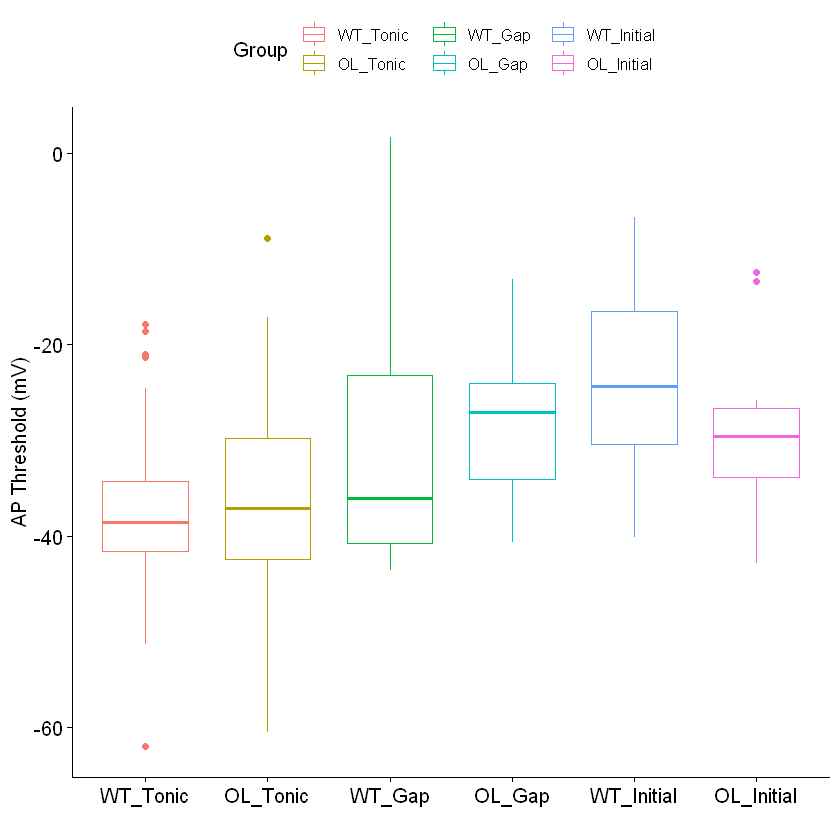

In [53]:
ggboxplot(AP_threshold, 
          x="Group", 
          y="AP_threshold", 
          color="Group", 
          order = c("WT_Tonic", "OL_Tonic", "WT_Gap", "OL_Gap", "WT_Initial", "OL_Initial"),
          ylab="AP Threshold (mV)", xlab="")

    3. Compute one-way ANOVA

In [55]:
res.aov <- aov(AP_threshold~Group, data=AP_threshold)
summary(res.aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Group         5   3558   711.7   8.034 1.01e-06 ***
Residuals   147  13022    88.6                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

    If ANOVA test is significant, we can compute Tukey HSD (Tukey Honest Significant Differences) for performing mutiple pairwise-comparison between the means of groups.

In [58]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = AP_threshold ~ Group, data = AP_threshold)

$Group
                            diff        lwr         upr     p adj
OL_Initial-OL_Gap      -1.968021 -12.659897  8.72385585 0.9948106
OL_Tonic-OL_Gap        -8.928426 -17.873892  0.01703947 0.0507456
WT_Gap-OL_Gap          -3.352043 -14.232061  7.52797460 0.9484706
WT_Initial-OL_Gap       3.057692  -7.071054 13.18643690 0.9526585
WT_Tonic-OL_Gap       -10.209947 -18.855479 -1.56441460 0.0106584
OL_Tonic-OL_Initial    -6.960406 -15.400062  1.47925086 0.1695565
WT_Gap-OL_Initial      -1.384023 -11.852128  9.08408289 0.9989281
WT_Initial-OL_Initial   5.025712  -4.659221 14.71064517 0.6657932
WT_Tonic-OL_Initial    -8.241926 -16.362989 -0.12086273 0.0444902
WT_Gap-OL_Tonic         5.576383  -3.100389 14.25315456 0.4335783
WT_Initial-OL_Tonic    11.986118   4.272295 19.69994039 0.0002073
WT_Tonic-OL_Tonic      -1.281520  -6.907958  4.34491726 0.9861